In [35]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import warnings
import os

warnings.filterwarnings('ignore')
print(os.listdir("Data/"))
FAST_RUN = False
IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

['sampleSubmission.csv', 'test1', 'train']


In [36]:
filenames = os.listdir("Data/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

In [37]:
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})


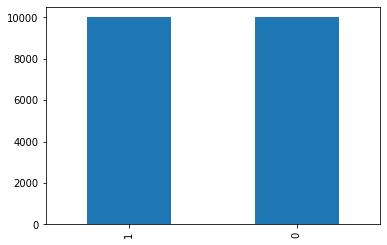

In [38]:
df['category'].value_counts().plot.bar()

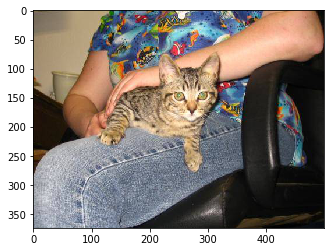

In [39]:
rastgeleOrnek = random.choice(filenames)
image = load_img("Data/train/"+rastgeleOrnek)
plt.imshow(image)

In [40]:
df['category'] = df['category'].replace({0: 'cat', 1: 'dog'}) 
df['category']

0        cat
1        cat
2        cat
3        cat
4        cat
        ... 
19995    dog
19996    dog
19997    dog
19998    dog
19999    dog
Name: category, Length: 20000, dtype: object

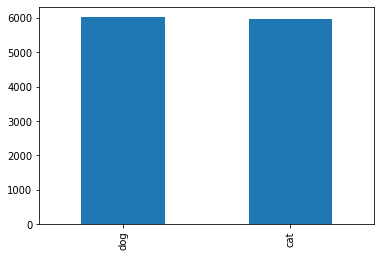

In [41]:
train_df, validate_df = train_test_split(df, test_size=0.40, random_state=42)
train_df['category'].value_counts().plot.bar()

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',use_bias=True, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#fully connected işlemi, 2 hidden layers
model.add(Flatten())
model.add(Dense(64, activation = 'relu',use_bias=True))
model.add(Dense(2, activation = 'relu',use_bias=True))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                1968192   
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 130       
Total params: 1,969,218
Trainable params: 1,969,218
Non-trainable params: 0
_________________________________________________________________


In [43]:
df['category'] = df['category'].replace({0: 'cat', 1: 'dog'}) 
df['category']

0        cat
1        cat
2        cat
3        cat
4        cat
        ... 
19995    dog
19996    dog
19997    dog
19998    dog
19999    dog
Name: category, Length: 20000, dtype: object

In [44]:
train_df, test_df = train_test_split(df, test_size=0.40, random_state=42)


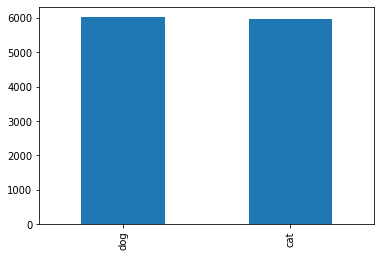

In [45]:
train_df['category'].value_counts().plot.bar()

In [46]:
total_train = train_df.shape[0]
total_train

12000

In [47]:
total_validate = test_df.shape[0]
total_validate

8000

In [48]:
batch_size=100

In [49]:
#Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
#Data augmentation
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "Data/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "Data/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(   #data augmentation işlemi, gerçek veriye benzeyen imageler üretilir
    example_df,   #zoom, zoomin,zoomout resmin farklı yerine koyma, döndürme, sola sağa yatırma
    "Data/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 12000 validated image filenames belonging to 2 classes.
Found 8000 validated image filenames belonging to 2 classes.
Found 1 validated image filenames belonging to 1 classes.


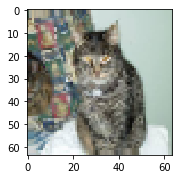

In [50]:
plt.figure(figsize=(12, 12))
for i in range(0, 1):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [51]:
epochs=1 if FAST_RUN else 500 #epoch değeri küçük olmalı
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
)

Epoch 1/500
120/120 [==============================] - 70s 581ms/step - loss: 0.7418 - acc: 0.5256 - val_loss: 0.6862 - val_acc: 0.5171
Epoch 2/500
120/120 [==============================] - 68s 569ms/step - loss: 0.6663 - acc: 0.6102 - val_loss: 0.6169 - val_acc: 0.6709
Epoch 3/500
120/120 [==============================] - 71s 594ms/step - loss: 0.6298 - acc: 0.6562 - val_loss: 0.5943 - val_acc: 0.6911
Epoch 4/500
120/120 [==============================] - 70s 580ms/step - loss: 0.6182 - acc: 0.6751 - val_loss: 0.6595 - val_acc: 0.6651
Epoch 5/500
120/120 [==============================] - 69s 575ms/step - loss: 0.6298 - acc: 0.6846 - val_loss: 0.5640 - val_acc: 0.7323
Epoch 6/500
120/120 [==============================] - 65s 541ms/step - loss: 0.6174 - acc: 0.6922 - val_loss: 0.6980 - val_acc: 0.6503
Epoch 7/500
120/120 [==============================] - 65s 539ms/step - loss: 0.6054 - acc: 0.6988 - val_loss: 0.5709 - val_acc: 0.7211
Epoch 8/500
120/120 [===========================

120/120 [==============================] - 65s 538ms/step - loss: nan - acc: 0.4978 - val_loss: nan - val_acc: 0.5032
Epoch 64/500
120/120 [==============================] - 65s 539ms/step - loss: nan - acc: 0.4978 - val_loss: nan - val_acc: 0.5032
Epoch 65/500
120/120 [==============================] - 65s 539ms/step - loss: nan - acc: 0.4978 - val_loss: nan - val_acc: 0.5032
Epoch 66/500
120/120 [==============================] - 65s 539ms/step - loss: nan - acc: 0.4978 - val_loss: nan - val_acc: 0.5032
Epoch 67/500
120/120 [==============================] - 66s 549ms/step - loss: nan - acc: 0.4978 - val_loss: nan - val_acc: 0.5032
Epoch 68/500
120/120 [==============================] - 65s 544ms/step - loss: nan - acc: 0.4978 - val_loss: nan - val_acc: 0.5032
Epoch 69/500
120/120 [==============================] - 65s 539ms/step - loss: nan - acc: 0.4978 - val_loss: nan - val_acc: 0.5032
Epoch 70/500
120/120 [==============================] - 65s 539ms/step - loss: nan - acc: 0.4978

KeyboardInterrupt: 